# Influencer Funnel Dashboard

This project simulates an influencer analytics dashboard similar to what is expected in a Trendyol Ads / Influencer CRM Analytics role.  
The aim is to analyze influencer performance, segment them based on scores, and visualize key metrics such as revenue, conversions, and engagement.  

The dataset contains simulated metrics for 100 influencers across multiple campaigns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv("influencer_funnel_dataset.csv")
df.head()


,influencer_id,campaign_type,date,category,follower_count,engagement_rate,impressions,clicks,add_to_cart,purchases,revenue
0,1,seasonal,2025-01-01,electronics,126958,0.121516,39158,4404,1142,203,8046.71
1,1,brand_collab,2025-01-02,home,126958,0.121516,48191,2733,273,116,2403.31
2,1,brand_collab,2025-01-03,fashion,126958,0.121516,3433,121,13,3,329.11
3,1,launch,2025-01-04,electronics,126958,0.121516,42434,4059,401,98,7801.66
4,1,discount,2025-01-05,fashion,126958,0.121516,2899,237,60,7,878.03


## Dataset Overview

- **Number of influencers:** Total unique influencers in the dataset  
- **Number of days:** Number of distinct days the data covers  
- **Category distribution:** Count of influencers per category  
- **Key metrics:** Summary statistics for impressions, clicks, add_to_cart, purchases, and revenue

In [ ]:
print("Number of influencers:", df['influencer_id'].nunique())

print("Number of days:", df['date'].nunique())

print(df['category'].value_counts())

print(df[['impressions','clicks','add_to_cart','purchases','revenue']].describe())

Number of influencers: 100
Number of days: 30
category
beauty         626
home           605
sports         591
electronics    590
fashion        588
Name: count, dtype: int64
       impressions       clicks  add_to_cart    purchases        revenue
count    3000.0000  3000.000000  3000.000000  3000.000000    3000.000000
mean    25394.5990  2051.204000   462.414000   163.739000   16887.657907
std     14004.2547  1638.026324   455.427267   187.908137   22840.103888
min      1002.0000    17.000000     1.000000     0.000000       0.000000
25%     13361.5000   721.750000   129.750000    39.000000    2804.065000
50%     25098.5000  1609.500000   315.000000    98.000000    8597.715000
75%     37272.0000  3017.000000   644.000000   222.000000   21310.110000
max     49994.0000  7405.000000  2773.000000  1418.000000  227113.380000


## Funnel Metrics Calculation

We calculate key performance metrics for each influencer to understand their effectiveness across the funnel:

- **CTR (Click-Through Rate):** clicks / impressions  
- **ATC Rate (Add-to-Cart Rate):** add_to_cart / clicks  
- **Purchase Rate:** purchases / add_to_cart  
- **Overall Conversion Rate:** purchases / impressions  
- **RPC (Revenue per Click):** revenue / clicks  
- **RPI (Revenue per Impression):** revenue / impressions

In [ ]:
df['ctr'] = df['clicks'] / df['impressions']
df['atc_rate'] = df['add_to_cart'] / df['clicks']
df['purchase_rate'] = df['purchases'] / df['add_to_cart']
df['overall_conv'] = df['purchases'] / df['impressions']
df['rpc'] = df['revenue'] / df['clicks']
df['rpi'] = df['revenue'] / df['impressions']


## Influencer Summary

We aggregate the dataset by influencer to create a summary table with key metrics:

- **Sum metrics:** impressions, clicks, add_to_cart, purchases, revenue  
- **Average rates:** ctr, atc_rate, purchase_rate, overall_conv, rpc, rpi  
- **Static info:** follower_count (first value), category (most frequent category)

This table gives a concise view of each influencer's overall performance.

In [19]:
inf_summary = df.groupby('influencer_id').agg({
    'impressions':'sum',
    'clicks':'sum',
    'add_to_cart':'sum',
    'purchases':'sum',
    'revenue':'sum',
    'ctr':'mean',
    'atc_rate':'mean',
    'purchase_rate':'mean',
    'overall_conv':'mean',
    'rpc':'mean',
    'rpi':'mean',
    'follower_count':'first',
    'category': lambda x: x.mode()[0]
}).reset_index()

inf_summary.head()


,influencer_id,impressions,clicks,add_to_cart,purchases,revenue,ctr,atc_rate,purchase_rate,overall_conv,rpc,rpi,follower_count,category
0,1,772988,49112,11246,3803,327864.24,0.071081,0.216692,0.319435,0.005091,6.067737,0.457675,126958,electronics
1,2,710796,62709,13497,5147,591578.05,0.092203,0.233118,0.357032,0.008438,10.490528,0.986940,488951,electronics
2,3,870136,70356,15594,6265,644284.73,0.078673,0.197178,0.363854,0.006540,8.479872,0.723951,487859,fashion
3,4,753369,52688,11237,3866,392285.61,0.065558,0.216152,0.348865,0.005133,7.827905,0.533500,304888,electronics
4,5,748967,70668,16509,6122,613320.76,0.095289,0.228112,0.349520,0.007713,6.786521,0.737570,351699,electronics


## Influencer Scoring

We create a composite **influencer score** to rank influencers based on key funnel metrics.  
Weights are assigned as follows:Markdown

- **Overall Conversion Rate:** 30%  
- **Revenue per Click (RPC):** 30%  
- **Click-Through Rate (CTR):** 20%  
- **Purchase Rate:** 20%  

This score helps identify top-performing influencers efficiently.

In [ ]:
inf_summary['influencer_score'] = (
    inf_summary['overall_conv'] * 0.30 +
    inf_summary['rpc'] * 0.30 +
    inf_summary['ctr'] * 0.20 +
    inf_summary['purchase_rate'] * 0.20
)

inf_summary.sort_values('influencer_score', ascending=False).head()


,influencer_id,impressions,clicks,add_to_cart,purchases,revenue,ctr,atc_rate,purchase_rate,overall_conv,rpc,rpi,follower_count,category,influencer_score
15,16,796678,75645,20487,8221,1014435.67,0.088059,0.265559,0.377062,0.009718,11.670267,1.164889,244719,electronics,3.597019
80,81,705428,60752,13867,6114,634694.18,0.086544,0.244021,0.402692,0.009122,11.277305,0.937872,418869,beauty,3.483775
89,90,940063,78474,17705,6098,717012.10,0.084853,0.227891,0.367839,0.006957,10.590946,0.847165,273999,home,3.269909
1,2,710796,62709,13497,5147,591578.05,0.092203,0.233118,0.357032,0.008438,10.490528,0.986940,488951,electronics,3.239537
10,11,855199,63248,14753,6341,761081.58,0.071436,0.224173,0.404657,0.006973,10.453500,0.819054,434440,electronics,3.233360


## Influencer Segmentation

We segment influencers into three performance groups based on their composite influencer score:

- **Low Performer:** Score ≤ 33rd percentile  
- **Mid Performer:** 34th–66th percentile  
- **High Performer:** Score > 66th percentile  

This segmentation helps categorize influencers for targeted strategies and insights.

In [21]:
q1 = inf_summary['influencer_score'].quantile(0.33)
q2 = inf_summary['influencer_score'].quantile(0.66)

def segment(x):
    if x <= q1:
        return 'Low Performer'
    elif x <= q2:
        return 'Mid Performer'
    else:
        return 'High Performer'

inf_summary['segment_3'] = inf_summary['influencer_score'].apply(segment)


## Segment Distribution

The pie chart shows the distribution of influencers across the three performance segments:

- **Low Performer:** Bottom 33% of influencer scores  
- **Mid Performer:** Middle 34–66%  
- **High Performer:** Top 34%  

This visualization helps quickly understand the proportion of influencers in each performance group.

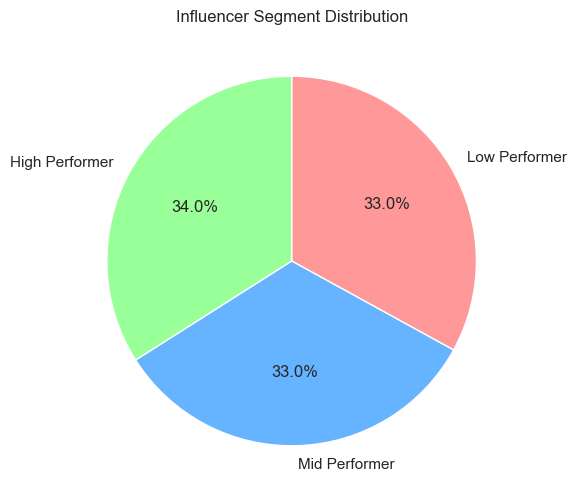

In [ ]:
segment_counts = inf_summary['segment_3'].value_counts().reindex(['Low Performer','Mid Performer','High Performer'])
plt.figure(figsize=(6,6))
segment_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99'],
    startangle=90,
    counterclock=False
)
plt.title("Influencer Segment Distribution")
plt.ylabel("")
plt.show()


## Top 20 Influencers by Revenue

This bar chart highlights the top 20 influencers ranked by total revenue.  
It provides a clear view of which influencers generate the most value for campaigns, helping prioritize engagement and resource allocation.

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\2723375845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='influencer_id', y='revenue', palette='viridis')


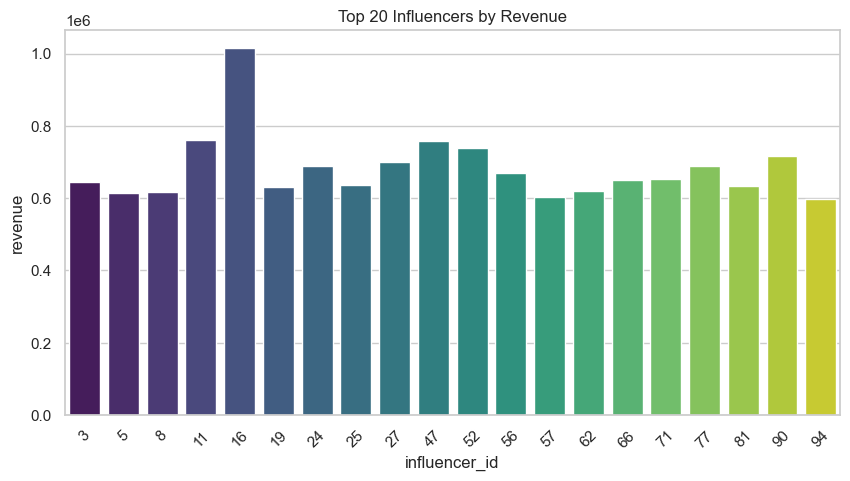

In [ ]:
plt.figure(figsize=(10,5))
top20 = inf_summary.sort_values('revenue', ascending=False).head(20)
sns.barplot(data=top20, x='influencer_id', y='revenue', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 20 Influencers by Revenue")
plt.show()

## Segment-wise Average Metrics

We calculate the average key metrics for each influencer segment:

- **CTR:** Click-Through Rate  
- **ATC Rate:** Add-to-Cart Rate  
- **Purchase Rate:** Purchase Rate  
- **Overall Conversion:** Purchases / Impressions  
- **RPC:** Revenue per Click  
- **RPI:** Revenue per Impression  
- **Revenue:** Total revenue  

This summary helps compare performance across Low, Mid, and High Performer segments.

In [24]:
metrics = ['ctr','atc_rate','purchase_rate','overall_conv','rpc','rpi','revenue']
segment_summary = inf_summary.groupby('segment_3')[metrics].mean().reset_index()

## Segment-wise Funnel Metrics Visualization

These bar charts show the average performance of each segment for key funnel metrics:

- **CTR (Click-Through Rate)**  
- **ATC Rate (Add-to-Cart Rate)**  
- **Purchase Rate**  
- **Overall Conversion Rate**  

This visualization helps identify which segments perform best at each stage of the funnel.

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\3143420365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])


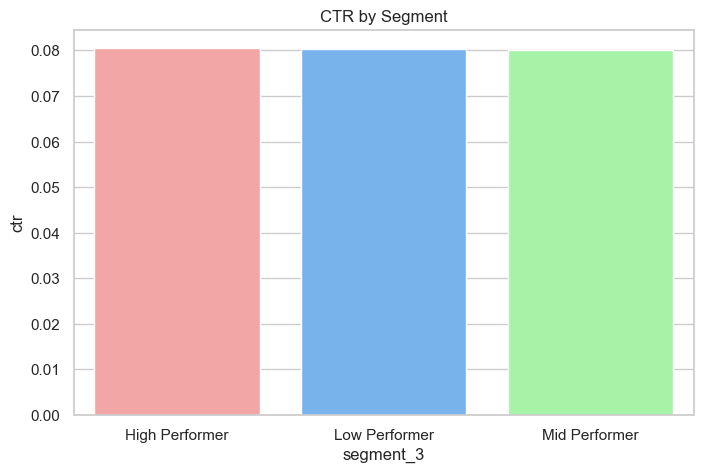

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\3143420365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])


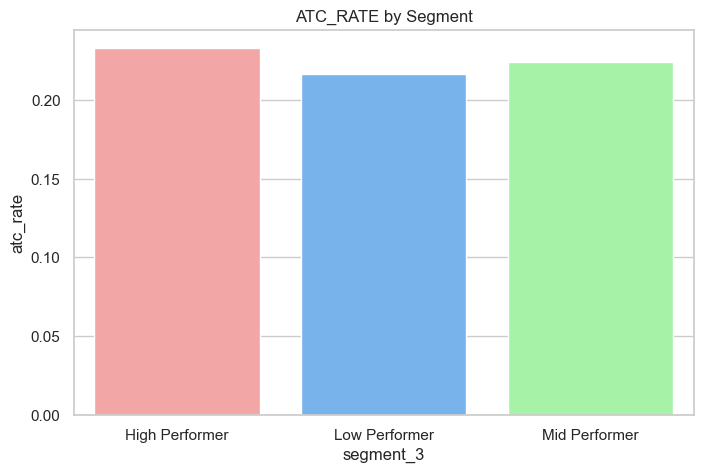

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\3143420365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])


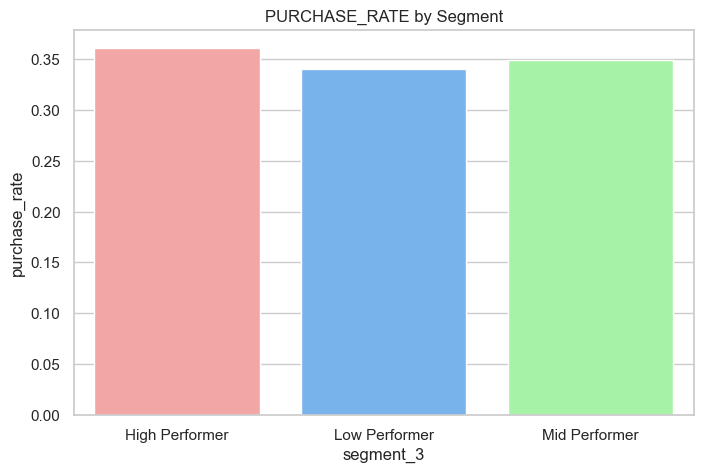

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\3143420365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])


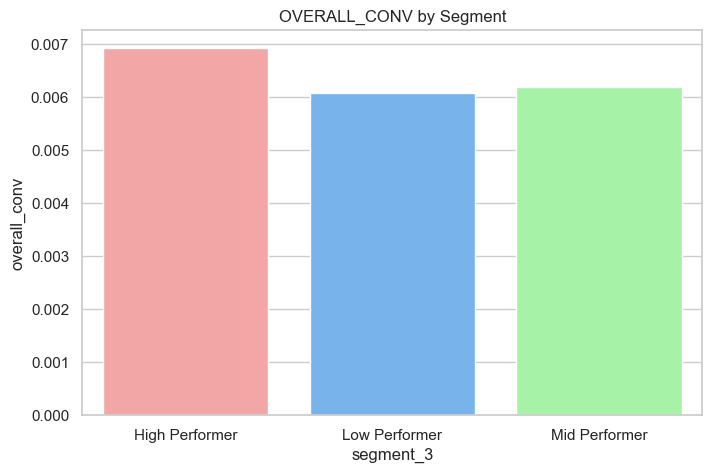

In [25]:
for metric in ['ctr','atc_rate','purchase_rate','overall_conv']:
    plt.figure(figsize=(8,5))
    sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])
    plt.title(f'{metric.upper()} by Segment')
    plt.ylabel(metric)
    plt.show()

## Segment-wise Revenue Metrics Visualization

These bar charts show the average revenue-related metrics for each influencer segment:

- **Revenue:** Total revenue per segment  
- **RPC (Revenue per Click):** Average revenue generated per click  
- **RPI (Revenue per Impression):** Average revenue generated per impression  

This helps assess which segments contribute most to revenue and cost efficiency.

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\923221400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])


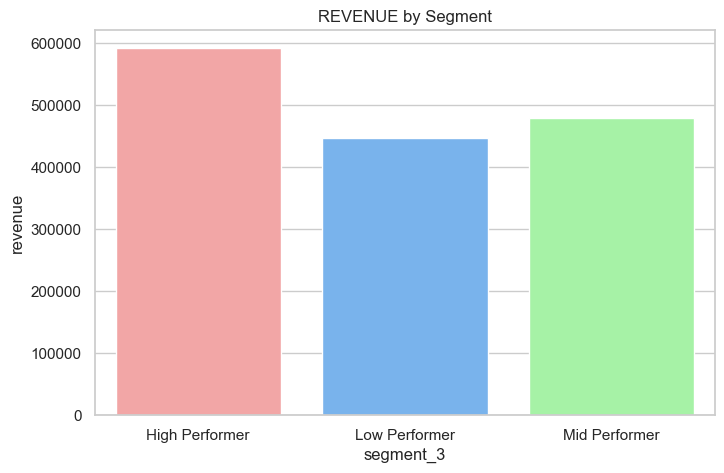

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\923221400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])


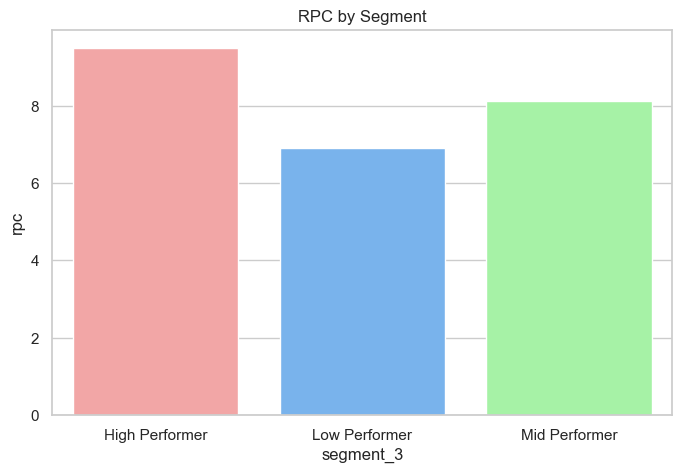

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\923221400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])


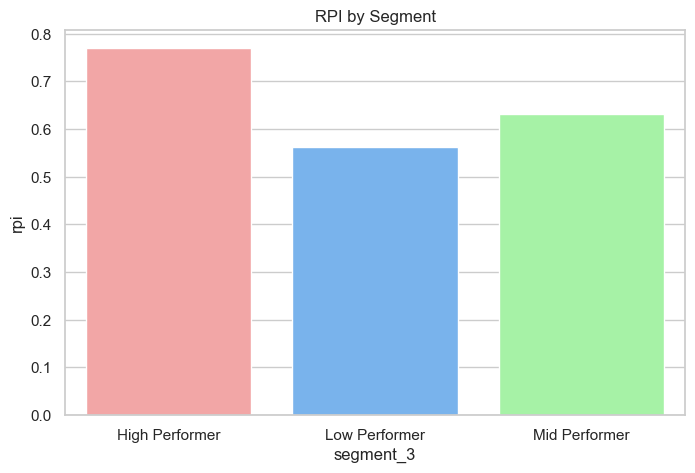

In [26]:
for metric in ['revenue','rpc','rpi']:
    plt.figure(figsize=(8,5))
    sns.barplot(x='segment_3', y=metric, data=segment_summary, palette=['#ff9999','#66b3ff','#99ff99'])
    plt.title(f'{metric.upper()} by Segment')
    plt.ylabel(metric)
    plt.show()

## Funnel Metrics Heatmap by Segment

The heatmap displays the average funnel metrics (CTR, ATC Rate, Purchase Rate, Overall Conversion) for each influencer segment.  

- Darker colors indicate higher values.  
- This visualization quickly highlights which segments perform better at different stages of the funnel.

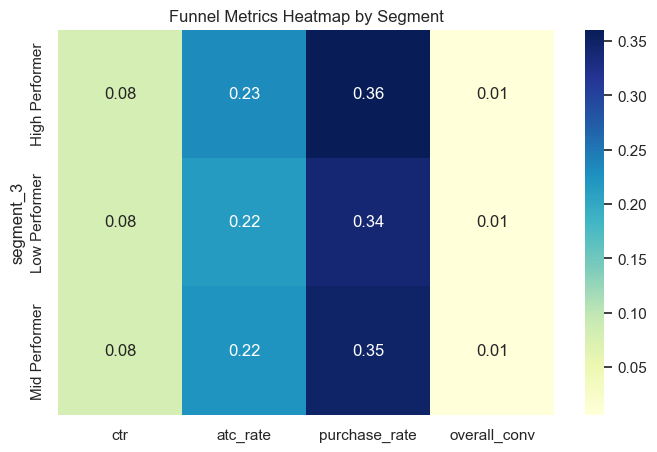

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(segment_summary.set_index('segment_3')[['ctr','atc_rate','purchase_rate','overall_conv']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Funnel Metrics Heatmap by Segment")
plt.show()

## Top 10 Influencers by Score

This table lists the top 10 influencers based on the composite influencer score.  

It shows:

- **Influencer ID**  
- **Segment** (Low, Mid, High Performer)  
- **Influencer Score**  
- **Revenue**  
- **Overall Conversion Rate**  

This helps identify high-performing influencers for targeted campaigns and engagement strategies.

In [28]:
top_influencers = inf_summary.sort_values('influencer_score', ascending=False).head(10)
print(top_influencers[['influencer_id','segment_3','influencer_score','revenue','overall_conv']])

    influencer_id       segment_3  influencer_score     revenue  overall_conv
15             16  High Performer          3.597019  1014435.67      0.009718
80             81  High Performer          3.483775   634694.18      0.009122
89             90  High Performer          3.269909   717012.10      0.006957
1               2  High Performer          3.239537   591578.05      0.008438
10             11  High Performer          3.233360   761081.58      0.006973
82             83  High Performer          3.221308   538489.17      0.006811
61             62  High Performer          3.135678   620475.73      0.007578
70             71  High Performer          3.125621   651861.10      0.007204
56             57  High Performer          3.036566   602424.44      0.008268
93             94  High Performer          3.026584   598525.29      0.008167


## Overall Funnel Flow

This bar chart shows the total funnel flow across all influencers:

- **Impressions → Clicks → Add to Cart → Purchases**  

It helps visualize drop-offs at each stage of the funnel and highlights potential areas for optimization.

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_5160\2384020563.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funnel_metrics, y=funnel_flow.values, palette='pastel')


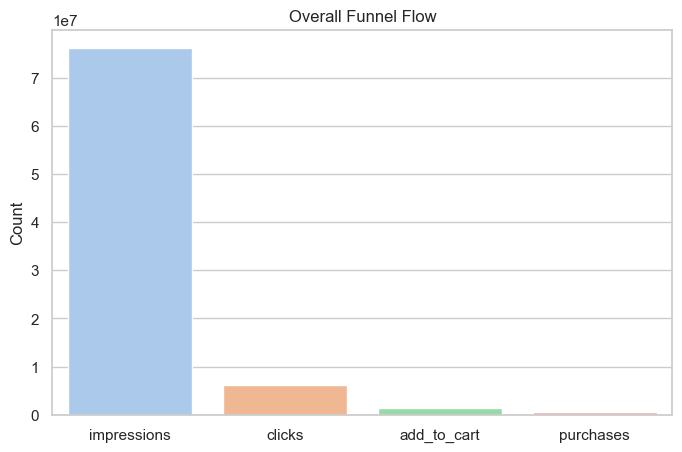

In [29]:
funnel_metrics = ['impressions','clicks','add_to_cart','purchases']
funnel_flow = inf_summary[funnel_metrics].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=funnel_metrics, y=funnel_flow.values, palette='pastel')
plt.title("Overall Funnel Flow")
plt.ylabel("Count")
plt.show()


## Export Summary Report

The summarized influencer data, including calculated metrics, scores, and segments, is exported to a CSV file for further analysis or dashboard integration.

- **Filename:** influencer_summary_report.csv

In [30]:
# CSV export
inf_summary.to_csv("influencer_summary_report.csv", index=False)
print("CSV export completed: influencer_summary_report.csv")


CSV export completed: influencer_summary_report.csv
